In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets_df = pd.read_csv("/content/drive/MyDrive/labeled_data.csv")
tweets_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweets_df = tweets_df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'], axis=1)
tweets_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Adding lenght column to the dataset

In [ ]:
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df

,class,tweet,length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146
24779,2,"you've gone and broke the wrong heart baby, an...",70
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,67
24781,1,youu got wild bitches tellin you lies,37


## Segregating(dividing) data on the basis of class

In [ ]:
hatespeech = tweets_df[tweets_df['class']== 0]
hatespeech

,class,tweet,length
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",61
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",83
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",119
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",117
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",72
...,...,...,...
24576,0,this guy is the biggest faggot omfg,35
24685,0,which one of these names is more offensive kik...,106
24751,0,you a pussy ass nigga and I know it nigga.,42
24776,0,you're all niggers,18


In [ ]:
offensive = tweets_df[tweets_df['class']==1]
offensive

,class,tweet,length
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",158
...,...,...,...
24774,1,you really care bout dis bitch. my dick all in...,58
24775,1,"you worried bout other bitches, you need me for?",48
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,67


In [ ]:
neutral = tweets_df[tweets_df["class"]==2]
neutral

,class,tweet,length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
40,2,""" momma said no pussy cats inside my doghouse """,47
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",87
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",66
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",69
...,...,...,...
24736,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...,75
24737,2,yea so about @N_tel 's new friend.. all my fri...,115
24767,2,"you know what they say, the early bird gets th...",95
24779,2,"you've gone and broke the wrong heart baby, an...",70


## Visualizing each class

In [ ]:
sentences = hatespeech["tweet"].tolist()
len(sentences)

1430

In [ ]:
sentence_as_one_string=" ".join(sentences)

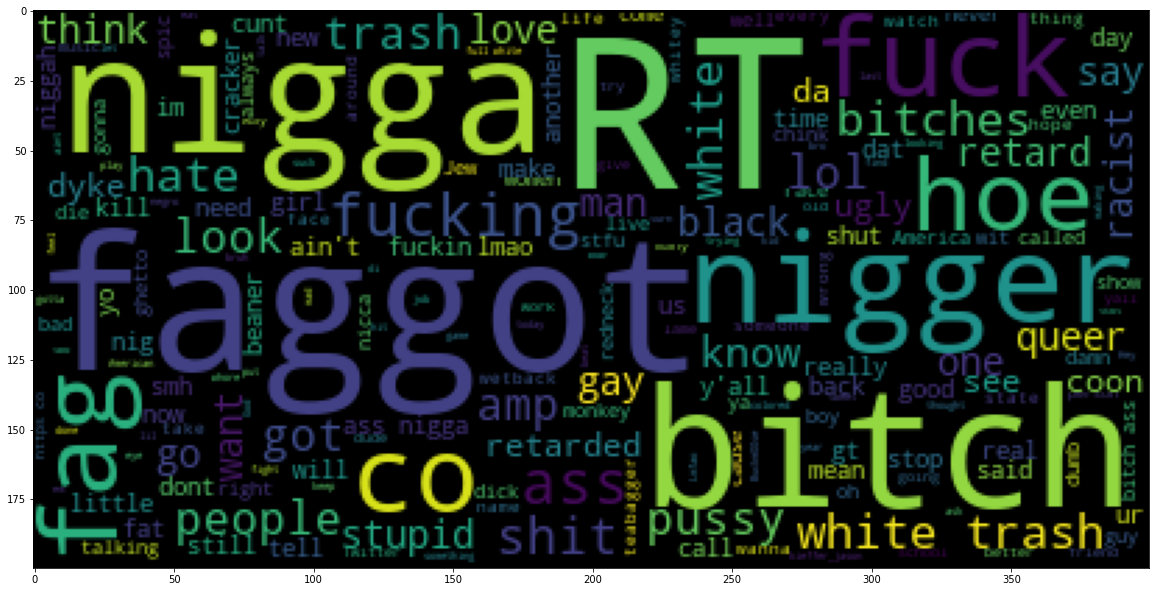

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one_string))

In [ ]:
sentences = offensive['tweet'].tolist()
len(sentences)

19190

In [ ]:
sentences_as_one_string = " ".join(sentences)

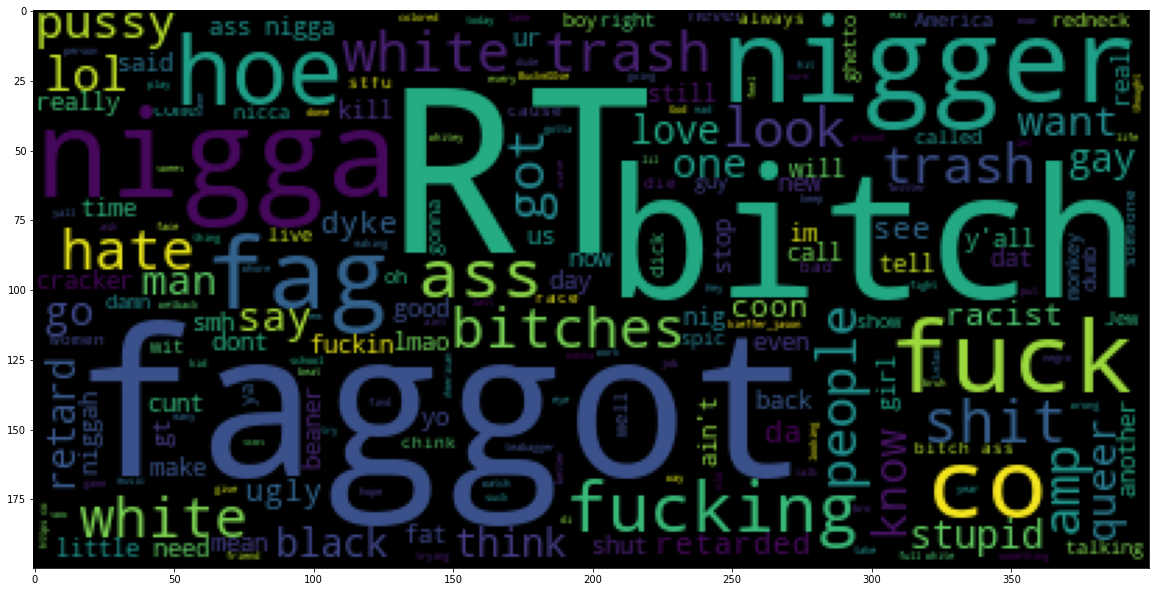

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one_string))

In [ ]:
sentences = neutral["tweet"].tolist()
len(sentences)

4163

In [ ]:
sentence_as_one_string=" ".join("sentences")

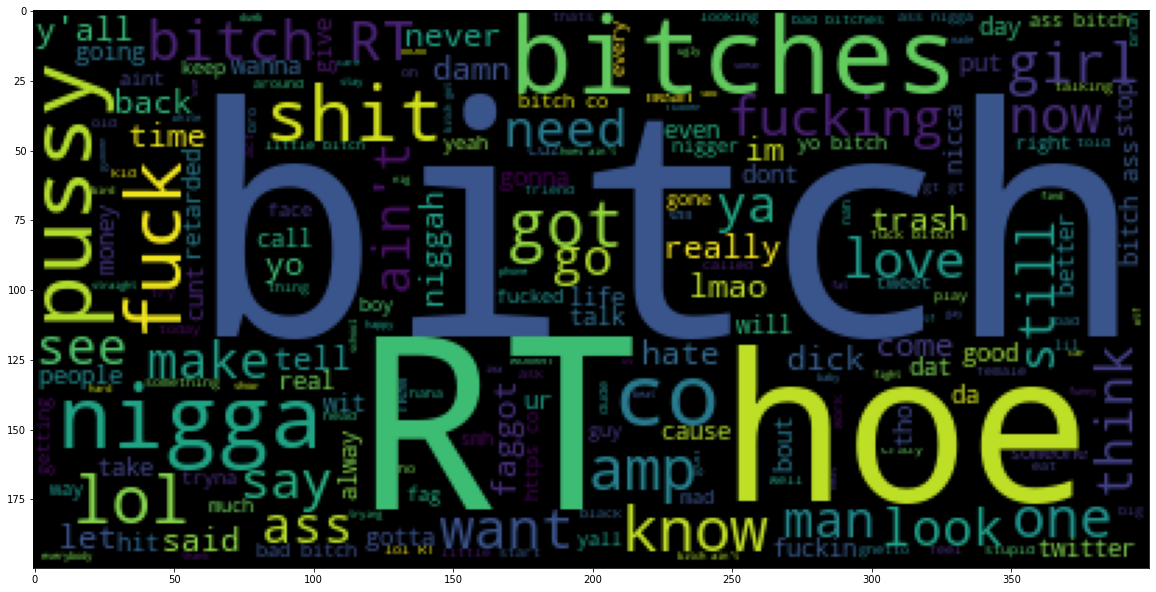

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Preprocessing the tweet

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join

In [ ]:
# Create a new Dataframe for cleaned text
tweets_df_clean = pd.DataFrame(columns=['class', 'tweet'])
tweets_df_clean['tweet'] = tweets_df['tweet'].apply(message_cleaning)
tweets_df_clean['class'] = tweets_df['class']

In [ ]:
tweets_df_clean.head()

,class,tweet
0,2,RT mayasolovely woman shouldnt complain cleani...
1,1,RT mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,RT UrKindOfBrand Dawg RT 80sbaby4life ever fuc...
3,1,RT CGAnderson vivabased look like tranny
4,1,RT ShenikaRoberts shit hear might true might f...


In [ ]:
print(tweets_df_clean['tweet'][5]) # show the cleaned up version
print(tweets_df['tweet'][5]) # show the original version

TMadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"


## Vectorizing the cleaned text for model training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning,
            dtype = 'uint8').fit_transform(tweets_df_clean['tweet']).toarray()

In [ ]:
tweets_countvectorizer.shape

(24783, 63)

In [ ]:
X = tweets_countvectorizer
X

array([[11,  0,  0, ...,  0,  3,  0],
       [11,  0,  2, ...,  0,  2,  0],
       [11,  1,  0, ...,  0,  2,  0],
       ...,
       [ 9,  0,  0, ...,  0,  1,  0],
       [ 5,  0,  0, ...,  0,  1,  0],
       [13,  1,  0, ...,  0,  1,  0]], dtype=uint8)

In [ ]:
y = tweets_df_clean['class']
y = pd.get_dummies(y)
y = np.array(y)
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
X.shape

(24783, 63)

In [ ]:
y.shape

(24783, 3)

# Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train.shape

(22304, 63)

In [ ]:
total_words = 200
total_words

200

# Training Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [ ]:
# Sequential Model
model1 = Sequential()

# embeddidng layer
model1.add(Embedding(total_words, output_dim = 32))
model1.add(LSTM(32))
model1.add(RepeatVector(200))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

model1.add(Dense(3,activation= 'softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400      
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 repeat_vector (RepeatVector  (None, 200, 32)          0         
 )                                                               
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
# train the model
history = model1.fit(X_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 50)

Epoch 1/50
79/79 [==============================] - 9s 80ms/step - loss: 0.7952 - acc: 0.7671 - val_loss: 0.7006 - val_acc: 0.7624
Epoch 2/50
79/79 [==============================] - 6s 71ms/step - loss: 0.6616 - acc: 0.7758 - val_loss: 0.6842 - val_acc: 0.7624
Epoch 3/50
79/79 [==============================] - 6s 70ms/step - loss: 0.6525 - acc: 0.7758 - val_loss: 0.6809 - val_acc: 0.7624
Epoch 4/50
79/79 [==============================] - 6s 73ms/step - loss: 0.6504 - acc: 0.7758 - val_loss: 0.6804 - val_acc: 0.7624
Epoch 5/50
79/79 [==============================] - 6s 72ms/step - loss: 0.6486 - acc: 0.7758 - val_loss: 0.6809 - val_acc: 0.7624
Epoch 6/50
79/79 [==============================] - 6s 71ms/step - loss: 0.6489 - acc: 0.7758 - val_loss: 0.6824 - val_acc: 0.7624
Epoch 7/50
79/79 [==============================] - 6s 71ms/step - loss: 0.6480 - acc: 0.7762 - val_loss: 0.6820 - val_acc: 0.7624
Epoch 8/50
79/79 [==============================] - 6s 74ms/step - loss: 0.6470 - a

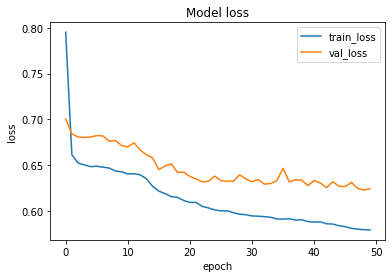

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

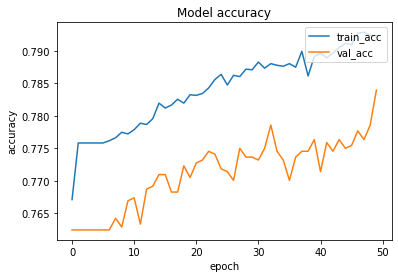

In [ ]:
# plot the training artifacts

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

Accessing the Model's Performance

In [ ]:
model1.evaluate(X_test,y_test)

78/78 [==============================] - 1s 8ms/step - loss: 0.5888 - acc: 0.7850


[0.5887564420700073, 0.7849939465522766]

In [ ]:
print(tweets_df['tweet'][0])
print(tweets_df['tweet'][1])
print(tweets_df['tweet'][2])
print(tweets_df['tweet'][3])
print(tweets_df['tweet'][4])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [ ]:
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet'][:5]).toarray()

In [ ]:
preds = model1.predict(tweets_countvectorizer)

In [ ]:
preds_class = []
for i in range(len(preds)):
    preds_class.append(np.argmax(preds[i]))
preds_class = np.array(preds_class) 

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = preds_class
df['Actual Labels'] = tweets_df['class'][:5]
df.head()

,Predicted Labels,Actual Labels
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1
